Import necessary packages.

In [1]:
import os
import json
import math
import numpy as np
import matplotlib.pyplot as plt

# Graph 1: simple SVD on a toy matrix

Firstly load the results from a local file storage.

In [2]:
RESULTS_PATH = 'just_svd'

Then load all the relevant metrics file according to the keywords. 

_Note: the number of latent factors shall be formally loaded from ```config.json```, but for brevity here, since the multiple runs align with the number of latent factors, we directly extract the parameters from its root folder._

In [3]:
# collect all rmse
rmse_list = list()
for root, _, files in os.walk(RESULTS_PATH):
    for file in files:
        if file == 'metrics.json':
            num_lat = int(root.split('/')[-1])
            mets = json.load(open(os.path.join(root, file), 'r'))
            rmse = float(mets['rmse']['values'][0])
            rmse_list.append((num_lat, rmse))
rmse_list = sorted(rmse_list, key=lambda x: x[0])

Separate each tuple into repsecitve indicators.

In [4]:
num_lats = [t[0] for t in rmse_list]
rmses = [t[1] for t in rmse_list]

Plot the graph, and save the result under the original log folder.

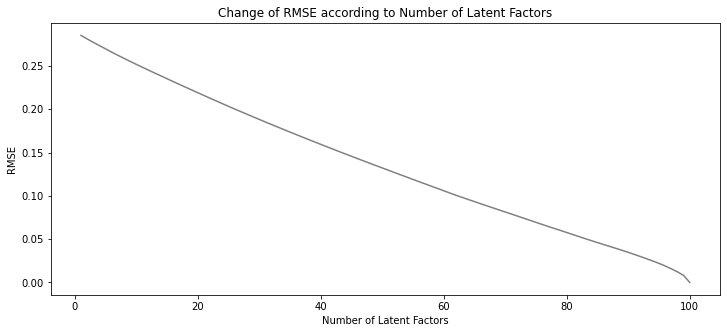

In [5]:
plt.figure(figsize=(12, 5))
plt.title('Change of RMSE according to Number of Latent Factors')
plt.xlabel('Number of Latent Factors')
plt.ylabel('RMSE')
plt.plot(num_lats, rmses, c='gray')
plt.savefig(os.path.join(RESULTS_PATH, 'vis_rmse.png'), dpi=144)

# Graph 2: SVD-based collaborative filtering on a small user-movie-rating dataset.

Firstly load the results from a local file storage.

In [6]:
RESULTS_PATH_CF = 'cf_svd'

Then load all the relevant metrics file according to the keywords.

In [7]:
# collect all rmse & map
full_list = list()
for root, _, files in os.walk(RESULTS_PATH_CF):
    lat_dim = None
    for file in files:
        if file == 'config.json':
            configs = json.load(open(os.path.join(root, file), 'r'))
            lat_dim = int(configs['LATENT_DIM'])
            neighbors_k = int(configs['NEIGHBOR_K'])
        if file == 'metrics.json':
            mets = json.load(open(os.path.join(root, file), 'r'))
            rmse = float(mets['train_rmse']['values'][0])
            vmap = float(mets['val_map']['values'][0])
    if lat_dim:
        full_list.append((lat_dim, neighbors_k, rmse, vmap))

Rearrange the results according to different metrics and hyperparams.

In [8]:
lds = sorted(list(set([t[0] for t in full_list])))
nks = sorted(list(set([t[1] for t in full_list])))

Plot the graph, and save the result under the original log folder.

## Graph 2a. Latent Factors & RMSE

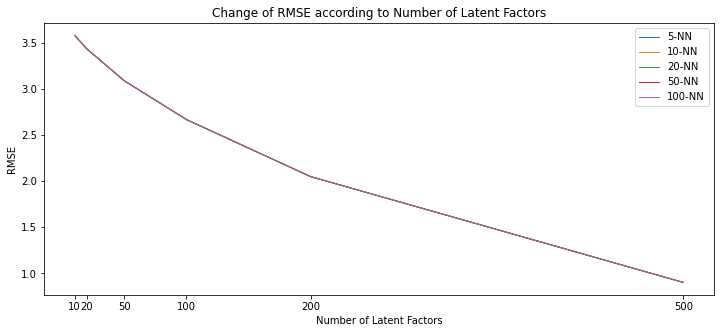

In [9]:
plt.figure(figsize=(12, 5))
plt.title('Change of RMSE according to Number of Latent Factors')
plt.xticks(lds)
plt.xlabel('Number of Latent Factors')
plt.ylabel('RMSE')
for nk in nks:
    grouped = sorted([(t[0], t[2]) for t in full_list if t[1] == nk], key=lambda x: int(x[0]))
    xs = [t[0] for t in grouped]
    ys = [t[1] for t in grouped]
    plt.plot(xs, ys, lw=1)
plt.legend(['%d-NN' % nk for nk in nks])
plt.savefig(os.path.join(RESULTS_PATH_CF, 'nlf_rmse.png'), dpi=144)

## Graph 2b. Latent Factors & MAP

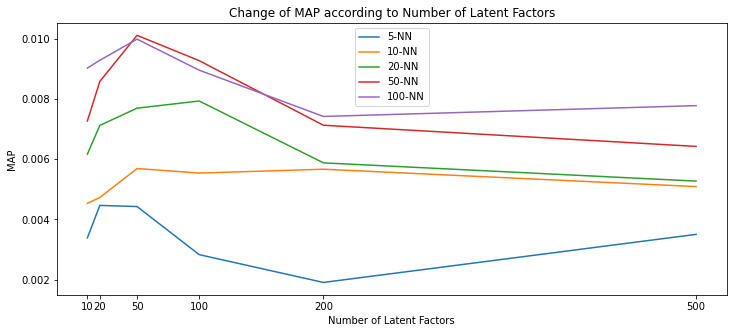

In [10]:
plt.figure(figsize=(12, 5))
plt.title('Change of MAP according to Number of Latent Factors')
plt.xticks(lds)
plt.xlabel('Number of Latent Factors')
plt.ylabel('MAP')
for nk in nks:
    grouped = sorted([(t[0], t[3]) for t in full_list if t[1] == nk], key=lambda x: int(x[0]))
    xs = [t[0] for t in grouped]
    ys = [t[1] for t in grouped]
    plt.plot(xs, ys)
plt.legend(['%d-NN' % nk for nk in nks])
plt.savefig(os.path.join(RESULTS_PATH_CF, 'nlf_map.png'), dpi=144)

## Graph 2c. Number of Neighbors & MAP

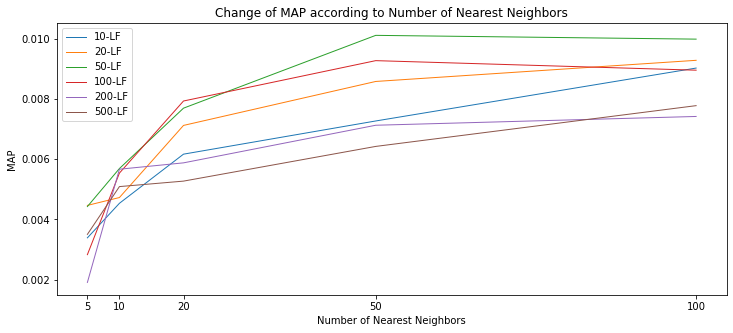

In [11]:
plt.figure(figsize=(12, 5))
plt.title('Change of MAP according to Number of Nearest Neighbors')
plt.xticks(nks)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('MAP')
for ld in lds:
    grouped = sorted([(t[1], t[3]) for t in full_list if t[0] == ld], key=lambda x: int(x[0]))
    xs = [t[0] for t in grouped]
    ys = [t[1] for t in grouped]
    plt.plot(xs, ys, lw=1)
plt.legend(['%d-LF' % ld for ld in lds])
plt.savefig(os.path.join(RESULTS_PATH_CF, 'nnn_map.png'), dpi=144)